# 데이터 정보
- 2013년 9월 이틀 동안 유럽 카드 소지자 카드 거래 내역
- 매우 불균형한 데이터 셋(사기거래 클래스는 전체 거래의 0.172%)


- 이미 PCA
- time - 첫번째 거래 이후 각 거래까지 경과된 시간
- amount - 거래 금액

In [ ]:
#result 값을 predict해서 넣는거인듯!

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [35]:
import matplotlib.pyplot as plt

In [36]:
import numpy as np

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
import pandas as pd

df = pd.read_csv('Problem.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,61860.0,0.530985,-1.368655,0.893127,0.370692,-1.301300,0.413628,-0.393875,0.218721,0.812112,...,0.046975,-0.263351,-0.148537,0.340996,-0.085972,0.907955,-0.074088,0.056354,309.00,0
1,164437.0,-7.357404,-1.601556,-4.676849,1.507472,-3.048604,1.264281,2.518449,0.905625,-0.676205,...,-0.621003,-0.544406,-1.438854,0.313489,0.776204,-0.102063,-0.397369,-1.945864,468.66,0
2,78471.0,-0.709215,-0.402005,2.300180,-2.461564,-0.759022,-0.127262,-0.333105,0.132349,-2.577745,...,-0.210459,-0.314094,0.044342,0.045298,-0.004456,-0.458079,0.086695,0.072301,29.40,0
3,172386.0,-1.100930,1.708435,-0.992206,-0.824640,0.499438,-0.617786,0.604869,0.357170,0.580096,...,-0.423325,-0.832064,0.185649,0.558143,-0.308057,0.088361,0.344577,0.052029,8.95,0
4,39374.0,-1.084659,1.875061,0.350536,3.167242,-0.391817,0.627411,-0.557509,1.254159,-1.153587,...,0.046381,0.290584,0.009724,-0.064580,-0.225990,0.279869,0.234683,0.045528,13.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213600,73826.0,-0.297228,0.837941,-0.299616,-1.110196,2.567544,3.253144,0.098229,0.937040,-0.501688,...,-0.318307,-1.007296,-0.050210,0.935690,-0.006366,0.088117,0.247066,0.091383,0.89,0
213601,55773.0,-0.608749,0.659941,1.560450,1.452568,0.088723,-0.349799,0.301728,0.220852,0.005055,...,-0.017199,0.153544,-0.047337,0.357099,-0.191730,-0.236428,0.409219,0.208162,5.68,0
213602,159100.0,2.041114,-0.153033,-1.190310,0.231333,0.016572,-0.720266,0.034818,-0.133703,0.393756,...,-0.265304,-0.694271,0.295240,-0.352259,-0.306028,0.200266,-0.078892,-0.074601,1.98,0
213603,78075.0,-0.568765,1.135885,1.193505,0.375710,0.483989,0.259682,0.070903,-0.615915,-0.872376,...,0.647125,-0.574880,-0.017092,-0.339691,-0.662538,0.202004,0.189188,0.148592,1.29,0


In [6]:
df['Class'].value_counts()

Class
0    213252
1       353
Name: count, dtype: int64

## 데이터 확인

In [7]:
df.groupby('Class')[df.columns[:-1]].describe().to_excel('describe.xlsx')

일단 amount 거래 금액 차이가 좀 큼

In [8]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,213252.0,88.320442,255.647410,0.0,5.55,21.98,76.80,25691.16
1,353.0,117.525552,252.593364,0.0,1.00,12.31,104.03,2125.87


In [10]:
# 클래스별로 Amount 데이터 분리
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

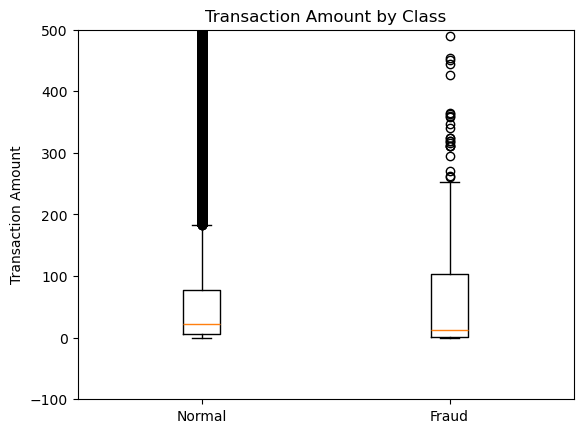

In [10]:
# 박스플롯 그리기
plt.boxplot([normal['Amount'], fraud['Amount']], labels=['Normal', 'Fraud'])
plt.title('Transaction Amount by Class')
plt.ylabel('Transaction Amount')
plt.ylim(-100,500)
plt.show()


In [11]:
df.groupby('Class')['Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,213252.0,94819.349394,47458.267439,0.0,54273.0,84655.5,139290.25,172788.0
1,353.0,79349.478754,46262.543593,406.0,41305.0,73408.0,115691.00,170348.0


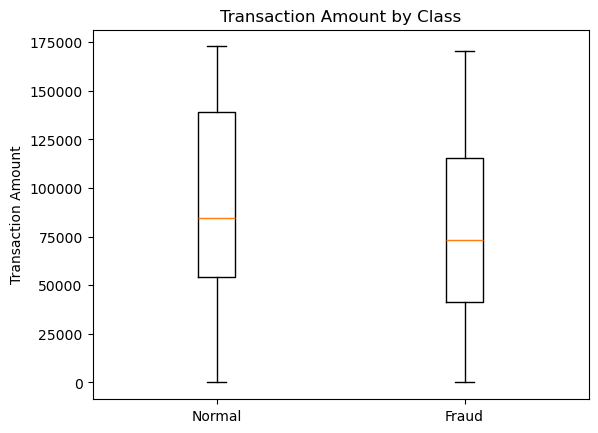

In [12]:
# 박스플롯 그리기
plt.boxplot([normal['Time'], fraud['Time']], labels=['Normal', 'Fraud'])
plt.title('Transaction Amount by Class')
plt.ylabel('Transaction Amount')
#plt.ylim(-100,500)
plt.show()

In [13]:
# 분단위로 차이가 있는지 봐봅시당
df['Time_min'] = df['Time'] / 60

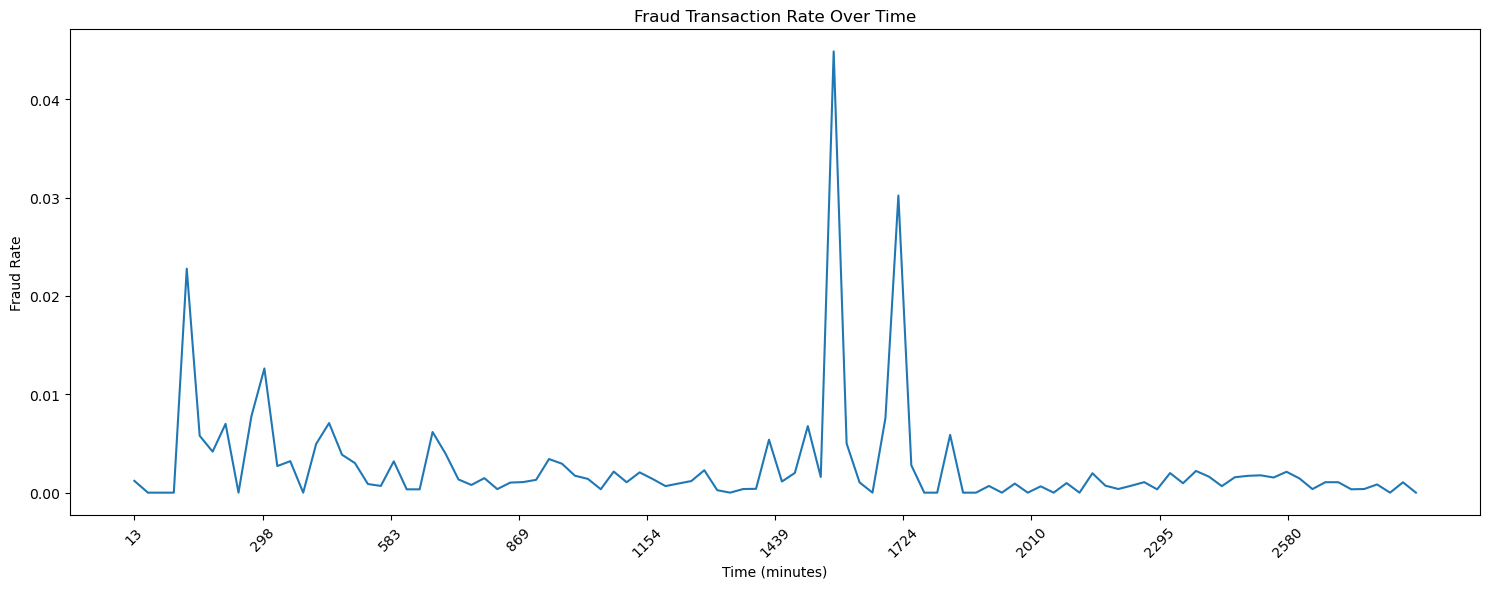

In [14]:
fraud_rate = df['Class'].groupby(pd.cut(df['Time_min'], bins=100)).mean()

# 구간 중간값 사용
bin_centers = [interval.mid for interval in fraud_rate.index]

plt.figure(figsize=(15, 6))
plt.plot(bin_centers, fraud_rate.values)
plt.title('Fraud Transaction Rate Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Fraud Rate')
plt.xticks(ticks=np.arange(min(bin_centers), max(bin_centers), step=(max(bin_centers)-min(bin_centers))/10), rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
fraud_rate = df['Class'].groupby(pd.cut(df['Time_min'], bins=100)).mean()

# 구간 중간값 사용
bin_centers = [interval.mid for interval in fraud_rate.index]

plt.figure(figsize=(15, 6))
plt.plot(bin_centers, fraud_rate.values)
plt.title('Fraud Transaction Rate Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Fraud Rate')
plt.xticks(ticks=np.arange(min(bin_centers), max(bin_centers), step=(max(bin_centers)-min(bin_centers))/10), rotation=45)
plt.tight_layout()
plt.show()


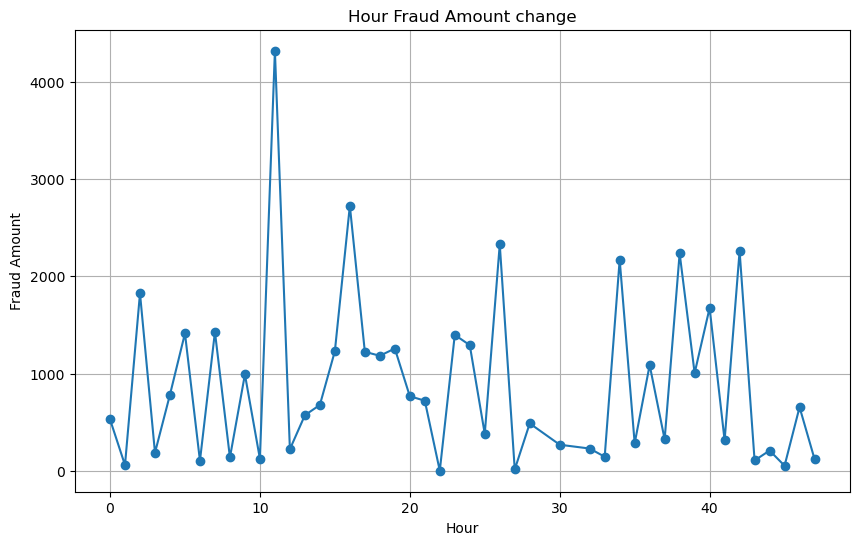

In [37]:
#시간대별 fraud 금액 변화를 알아볼까?
# 'Time' 값을 시간 단위로 변환 (초를 시간으로 변환)
# 여기서는 3600초 = 1시간이므로, 정수형 시간 단위로 변환합니다.
fraud['Hour'] = fraud['Time'] // 3600

# 시간대별 사기 거래 금액의 합계 계산
fraud_amount_by_hour = fraud.groupby('Hour')['Amount'].sum()
# print(fraud_amount_by_hour)

# 시간대별 fraud 금액 변화 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fraud_amount_by_hour.index, fraud_amount_by_hour.values, marker='o')
plt.title('Hour Fraud Amount change')
plt.xlabel('Hour')
plt.ylabel('Fraud Amount')
plt.grid(True)
plt.show()


## 데이터 전처리 

In [39]:
df['Time_hour'] = df['Time'] // 3600

In [40]:
# 분단위로 차이가 있는지 봐봅시당
df['Time_min'] = df['Time'] / 60

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213605 entries, 0 to 213604
Data columns (total 33 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       213605 non-null  float64
 1   V1         213605 non-null  float64
 2   V2         213605 non-null  float64
 3   V3         213605 non-null  float64
 4   V4         213605 non-null  float64
 5   V5         213605 non-null  float64
 6   V6         213605 non-null  float64
 7   V7         213605 non-null  float64
 8   V8         213605 non-null  float64
 9   V9         213605 non-null  float64
 10  V10        213605 non-null  float64
 11  V11        213605 non-null  float64
 12  V12        213605 non-null  float64
 13  V13        213605 non-null  float64
 14  V14        213605 non-null  float64
 15  V15        213605 non-null  float64
 16  V16        213605 non-null  float64
 17  V17        213605 non-null  float64
 18  V18        213605 non-null  float64
 19  V19        213605 non-n

In [42]:
# 'Amount'의 이상치가 많음
df['Amount'] = np.log1p(df['Amount'])

In [43]:
df['Amount'].describe()

count    213605.000000
mean          3.148996
std           1.657038
min           0.000000
25%           1.874874
50%           3.134189
75%           4.355169
max          10.153941
Name: Amount, dtype: float64

In [44]:
df.to_csv('df_preproces0414.csv',index=False)

## 모델 적용

In [91]:
df = pd.read_csv('df_preproces0414.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour,Time_min
0,61860.0,0.530985,-1.368655,0.893127,0.370692,-1.301300,0.413628,-0.393875,0.218721,0.812112,...,-0.148537,0.340996,-0.085972,0.907955,-0.074088,0.056354,5.736572,0,17.0,1031.000000
1,164437.0,-7.357404,-1.601556,-4.676849,1.507472,-3.048604,1.264281,2.518449,0.905625,-0.676205,...,-1.438854,0.313489,0.776204,-0.102063,-0.397369,-1.945864,6.152009,0,45.0,2740.616667
2,78471.0,-0.709215,-0.402005,2.300180,-2.461564,-0.759022,-0.127262,-0.333105,0.132349,-2.577745,...,0.044342,0.045298,-0.004456,-0.458079,0.086695,0.072301,3.414443,0,21.0,1307.850000
3,172386.0,-1.100930,1.708435,-0.992206,-0.824640,0.499438,-0.617786,0.604869,0.357170,0.580096,...,0.185649,0.558143,-0.308057,0.088361,0.344577,0.052029,2.297573,0,47.0,2873.100000
4,39374.0,-1.084659,1.875061,0.350536,3.167242,-0.391817,0.627411,-0.557509,1.254159,-1.153587,...,0.009724,-0.064580,-0.225990,0.279869,0.234683,0.045528,2.684440,0,10.0,656.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213600,73826.0,-0.297228,0.837941,-0.299616,-1.110196,2.567544,3.253144,0.098229,0.937040,-0.501688,...,-0.050210,0.935690,-0.006366,0.088117,0.247066,0.091383,0.636577,0,20.0,1230.433333
213601,55773.0,-0.608749,0.659941,1.560450,1.452568,0.088723,-0.349799,0.301728,0.220852,0.005055,...,-0.047337,0.357099,-0.191730,-0.236428,0.409219,0.208162,1.899118,0,15.0,929.550000
213602,159100.0,2.041114,-0.153033,-1.190310,0.231333,0.016572,-0.720266,0.034818,-0.133703,0.393756,...,0.295240,-0.352259,-0.306028,0.200266,-0.078892,-0.074601,1.091923,0,44.0,2651.666667
213603,78075.0,-0.568765,1.135885,1.193505,0.375710,0.483989,0.259682,0.070903,-0.615915,-0.872376,...,-0.017092,-0.339691,-0.662538,0.202004,0.189188,0.148592,0.828552,0,21.0,1301.250000


In [46]:
ran = 42

In [49]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, random_state=42, stratify=df['Class'])

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149523 entries, 157842 to 153754
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             149523 non-null  float64
 1   V1               149523 non-null  float64
 2   V2               149523 non-null  float64
 3   V3               149523 non-null  float64
 4   V4               149523 non-null  float64
 5   V5               149523 non-null  float64
 6   V6               149523 non-null  float64
 7   V7               149523 non-null  float64
 8   V8               149523 non-null  float64
 9   V9               149523 non-null  float64
 10  V10              149523 non-null  float64
 11  V11              149523 non-null  float64
 12  V12              149523 non-null  float64
 13  V13              149523 non-null  float64
 14  V14              149523 non-null  float64
 15  V15              149523 non-null  float64
 16  V16              149523 non-null  floa

In [113]:
# 시간대별 평균 금액
hourly_avg = train_df.groupby('Time_hour')['Amount'].mean()
train_df['Hour_avg_Amount'] = train_df['Time_hour'].map(hourly_avg)
test_df['Hour_avg_Amount'] = test_df['Time_hour'].map(hourly_avg).fillna(0)

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class TimeFraudRateEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, bins=100):
        self.bins = bins
        self.bin_edges_ = None
        self.fraud_rate_dic_ = None

    def fit(self, X, y):
        X_ = X.copy()
        X_['Time_min'] = X_['Time'] / 60

        time_bins_series, bin_edges = pd.cut(X_['Time_min'], bins=self.bins, retbins=True)
        fraud_rate_dic = pd.Series(y).groupby(time_bins_series).mean().to_dict()

        self.bin_edges_ = bin_edges
        self.fraud_rate_dic_ = fraud_rate_dic

        return self

    def transform(self, X):
        X = X.copy()
        X['Time_min'] = X['Time'] / 60

        # Binning
        X['Time_bin'] = pd.cut(X['Time_min'], bins=self.bin_edges_, include_lowest=True)

        # Time_bin 을 Label Encoding (숫자형 변환)
        X['Time_bin_encoded'] = pd.cut(X['Time_min'], bins=self.bin_edges_, include_lowest=True).cat.codes

        # Fraud rate 매핑
        X['Time_fraud_rate'] = X['Time_bin'].map(self.fraud_rate_dic_).fillna(0)

        # 중간 column 정리 (원하시면 Time_min 은 제거)
        X = X.drop(columns=['Time_min'])

        return X


In [117]:
train_x = train_df.drop(['Class'],axis = 1)
test_x = test_df.drop(['Class'],axis = 1)

train_y = train_df['Class']
test_y = test_df['Class']

encoder = TimeFraudRateEncoder(bins=100)
train_transformed = encoder.fit_transform(train_x, train_y)
test_transformed = encoder.transform(test_x)

In [119]:
del train_transformed['Time_bin']
del test_transformed['Time_bin']

### 샘플링

In [123]:
#오버/언더 샘플링 적용
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=ran)
X_smotomek, y_smotomek = smote_tomek.fit_resample(train_x, train_y)

In [124]:
y_smotomek.value_counts() 

Class
0    149026
1    149026
Name: count, dtype: int64

In [125]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection

smote = SMOTE(random_state=ran)
x_smote, y_smote = smote.fit_resample(train_x, train_y)

oss = OneSidedSelection(random_state=ran)
x_oss, y_oss = oss.fit_resample(train_x, train_y)

In [221]:
# 원본 컬럼 리스트
original_columns = [f'V{i}' for i in range(1, 29)]  # V1 ~ V28

# train, test, result_df 모두 변환
def add_squared_features(df):
    for col in original_columns:
        df[f'{col}_squared'] = df[col] ** 2
    return df

# 데이터프레임 적용
train_transformed = add_squared_features(train_transformed)
test_x = add_squared_features(test_transformed)
x_oss = add_squared_features(train_transformed)
x_oss

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19_squared,V20_squared,V21_squared,V22_squared,V23_squared,V24_squared,V25_squared,V26_squared,V27_squared,V28_squared
157842,151076.0,1.908014,-1.046448,-2.879504,-0.377866,0.203957,-1.389292,0.810898,-0.681450,-1.033611,...,0.219354,0.060521,0.001084,0.003731,0.121596,0.345836,0.248189,1.083212,0.027453,0.004185
54639,46891.0,1.294244,-1.071675,-1.182154,-1.565900,1.341786,3.469535,-1.025617,0.810162,-0.584897,...,1.653938,0.110816,0.000683,0.099675,0.019358,1.070478,0.472792,0.056450,0.000001,0.000417
25928,111399.0,1.865169,-0.309488,-1.416334,0.550772,0.142020,-0.884046,0.299422,-0.402876,2.032756,...,0.007777,0.003524,0.135728,1.007125,0.020205,0.484490,0.022878,0.381359,0.004773,0.001727
168029,167370.0,-0.023724,1.254199,-0.882579,-0.345355,0.884497,-0.846200,0.710607,-0.993468,0.192608,...,0.002504,0.025242,0.939261,0.344503,0.030437,0.556687,0.053182,0.008105,0.182056,0.035236
131901,167548.0,-0.343238,1.027282,-0.149392,-0.894284,1.361657,-0.494310,1.479888,-0.329736,-0.463497,...,0.221940,0.014394,0.000085,0.004849,0.230477,0.989907,0.107641,0.368946,0.010053,0.010024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66981,59162.0,0.943924,-0.233037,1.136642,1.409386,-0.742962,0.272459,-0.431820,0.114507,0.521170,...,0.777379,0.010196,0.049076,0.482569,0.024068,0.019709,0.193035,0.051545,0.005539,0.002645
130435,59999.0,-1.993356,1.775966,0.000351,-1.363780,-1.020629,-0.880757,-0.273749,0.969417,0.278923,...,0.393349,0.000363,0.010216,0.166621,0.000357,0.013026,0.003861,0.513743,0.163487,0.059605
68397,136480.0,-0.458099,-0.074424,2.378307,4.964394,-1.076329,2.853996,-0.069539,0.587414,-0.297864,...,2.228009,0.664730,0.130868,1.179279,0.339467,0.251718,0.821222,0.169713,0.067698,0.075628
123239,124050.0,-0.329992,1.037979,-0.383510,-0.389793,1.086459,-0.894450,0.945693,-0.246732,-0.367483,...,0.112990,0.009416,0.157989,1.391916,0.070156,0.149206,0.223909,0.034683,0.002776,0.072255


In [126]:
y_smote.value_counts(), y_oss.value_counts() 

(Class
 0    149276
 1    149276
 Name: count, dtype: int64,
 Class
 0    148825
 1       247
 Name: count, dtype: int64)

### 모델 적용


In [121]:
# 필요한 라이브러리
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

rf_model = RandomForestClassifier(random_state=ran, n_estimators=100)

In [122]:
xgb_model = XGBClassifier(
    random_state=ran,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.05,       # 학습률 (기본 0.3 → 0.05 정도로 낮추면 과적합 방지)
    max_depth=6,              # 트리 깊이 (보통 3~7 추천)
    n_estimators=500,         # 트리 개수
    subsample=0.8,            # 데이터 샘플링 비율
    colsample_bytree=0.8   
)

In [62]:
Logi_model = LogisticRegression(random_state=ran, max_iter=500,
                                penalty= 'l1',C = 1, solver='saga',
                                class_weight='balanced')

## 적용할 것: rf-oss/ xgb -SMOTETomek/Logi - SMOTETomek

In [145]:
rf_model.fit(x_oss, y_oss)
rf_model.score(test_x,test_y)
preds = rf_model.predict(test_x)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.96      0.81      0.88       106

    accuracy                           1.00     64082
   macro avg       0.98      0.91      0.94     64082
weighted avg       1.00      1.00      1.00     64082



f1-score 0.88이었음

In [68]:
rf_model.score(test_x,test_y)

0.9995006398052495

In [ ]:
xgb_model = XGBClassifier(
    random_state=ran,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.05,       # 학습률 (기본 0.3 → 0.05 정도로 낮추면 과적합 방지)
    max_depth=6,              # 트리 깊이 (보통 3~7 추천)
    n_estimators=500,         # 트리 개수
    subsample=0.8,            # 데이터 샘플링 비율
    colsample_bytree=0.8   
)

In [222]:
xgb_model.fit(x_oss, y_oss)

preds = xgb_model.predict(test_x)
print(classification_report(test_y, preds))

XGBoostError: [16:42:51] C:\actions-runner\_work\xgboost\xgboost\src\data\data.cc:542: Check failed: this->labels.Size() % this->num_row_ == 0 (149072 vs. 0) : Incorrect size for labels: (149072,1) v.s. 149523

In [127]:
ss = StandardScaler()
X_scaled_smotomek = ss.fit_transform(X_smotomek)
test_scaled = ss.transform(test_x)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 모델 정의
logi = LogisticRegression(random_state=ran, max_iter=500, solver='saga', class_weight='balanced')

# 하이퍼파라미터 그리드
param_grid = {
    'penalty': ['l1', 'l2'],                # 패널티 종류
    'C': [0.01, 0.1, 1, 10, 100],           # 규제 강도 (작을수록 강한 규제)
}

# 그리드서치
grid_search = GridSearchCV(logi, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(train_transformed, train_y)

# 결과 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 f1_macro 점수:", grid_search.best_score_)
Logi_model = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
최적 하이퍼파라미터: {'C': 1, 'penalty': 'l2'}
최고 f1_macro 점수: 0.6086839427230167


In [131]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=42,
                   solver='saga')

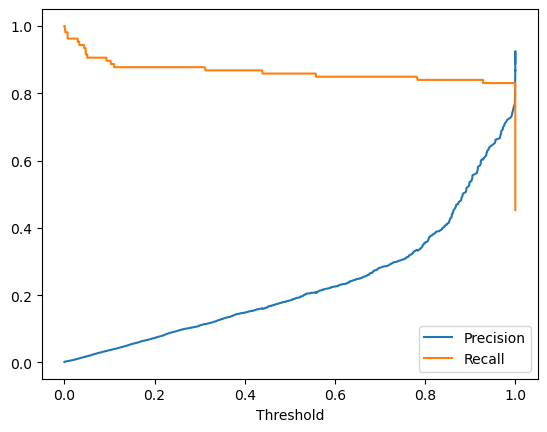

In [134]:
probs = Logi_model.predict_proba(test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(test_y, probs)

# 원하는 precision 수준의 threshold 선택
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.legend()
plt.xlabel('Threshold')
plt.show()

In [136]:
Logi_model.fit(X_scaled_smotomek, y_smotomek)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.41      0.84      0.55       106

    accuracy                           1.00     64082
   macro avg       0.71      0.92      0.78     64082
weighted avg       1.00      1.00      1.00     64082

Logi_model score: 0.9934771074560719


In [141]:
preds = Logi_model.predict(test_scaled)

# 원하는 threshold 지정
optimal_threshold = 0.85

# threshold 적용
y_pred_threshold = (probs >= optimal_threshold).astype(int)

print(classification_report(test_y, y_pred_threshold))
print("Logi_model score:", Logi_model.score(test_scaled, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.41      0.84      0.55       106

    accuracy                           1.00     64082
   macro avg       0.71      0.92      0.78     64082
weighted avg       1.00      1.00      1.00     64082

Logi_model score: 0.9934771074560719


In [140]:
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0

for t in np.arange(0.4,1.0,0.05):
    preds = (probs >= t).astype(int)
    f1 = f1_score(test_y, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold}, Best F1 Score: {best_f1}")


Best threshold: 0.9499999999999998, Best F1 Score: 0.7272727272727273


In [142]:
preds = Logi_model.predict(test_scaled)

# 원하는 threshold 지정
optimal_threshold = 0.949

# threshold 적용
y_pred_threshold = (probs >= optimal_threshold).astype(int)

print(classification_report(test_y, y_pred_threshold))
print("Logi_model score:", Logi_model.score(test_scaled, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.65      0.83      0.73       106

    accuracy                           1.00     64082
   macro avg       0.82      0.91      0.86     64082
weighted avg       1.00      1.00      1.00     64082

Logi_model score: 0.9934771074560719


In [143]:
# 저장
import pickle

with open('rf_model_0414.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('xgb_model_0414.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open('Logi_model_0414.pkl', 'wb') as f:
    pickle.dump(Logi_model, f)

## 모델 2 - 조정

In [160]:
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

rf_probs = rf_model.predict_proba(test_x)[:, 1]
xgb_probs = xgb_model.predict_proba(test_x)[:, 1]
logi_p = Logi_model.predict_proba(test_x)[:, 1]
optimal_threshold = 0.949  # 선택한 threshold 값
logi_probs = (logi_p >= optimal_threshold).astype(int)

# ====================
# Weighted average (가중치 조정)
# ====================

# 가중치 설정 (초기값, 이후에 튜닝 가능)
weights = {
    'rf': 0.5,
    'xgb': 0.3,
    'logi' : 0.2
}

# 가중 평균 계산
ensemble_probs = (
    rf_probs * weights['rf'] +
    xgb_probs * weights['xgb']+
    logi_probs * weights['logi']
)

for i in range(3,10):
    thres = 0.1 *i
    preds = (ensemble_probs >= thres).astype(int)
    f1 = f1_score(test_y, preds)
    
    print(f1)
    print(classification_report(test_y, preds))

0.8165137614678899
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.79      0.84      0.82       106

    accuracy                           1.00     64082
   macro avg       0.90      0.92      0.91     64082
weighted avg       1.00      1.00      1.00     64082

0.8476190476190476
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.86      0.84      0.85       106

    accuracy                           1.00     64082
   macro avg       0.93      0.92      0.92     64082
weighted avg       1.00      1.00      1.00     64082

0.8768472906403941
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.92      0.84      0.88       106

    accuracy                           1.00     64082
   macro avg       0.96      0.92      0.94     64082
weighted avg     

## 모델 조정3 - 앙상블 방식 변경 & RUS 빼고 해보기  

In [161]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

# 이미 학습된 base model predict_proba

rf_probs = rf_model.predict_proba(test_x)[:, 1]
xgb_probs = xgb_model.predict_proba(test_x)[:, 1]

logi_p = Logi_model.predict_proba(test_x)[:, 1]
optimal_threshold = 0.949  # 선택한 threshold 값
logi_probs = (logi_p >= optimal_threshold).astype(int)

# ====================
# 1. Weight Fine-tuning
# ====================

best_f1 = 0
best_weights = None
best_threshold = 0
best_preds = None

weight_range = np.arange(0.0, 1.01, 0.05)  # 0부터 1까지 0.05 단위로

# 두 모델의 가중치를 순회하고, 세번째는 남은 가중치로 계산 (합 = 1)
for rf_w in weight_range:
    for xgb_w in weight_range:
        logi_w = 1 - (rf_w + xgb_w)
        # logi_w가 0 이상 1 이하일 때만 사용
        if logi_w < 0 or logi_w > 1:
            continue
        
        # 각 모델의 가중치를 곱하여 ensemble 확률 계산
        ensemble_probs = (rf_probs * rf_w +
                          xgb_probs * xgb_w +
                          logi_probs * logi_w)

        # Threshold Fine-tuning (0.28 ~ 0.33 범위)
        threshold_range = np.arange(0.28, 0.33, 0.005)
        for threshold in threshold_range:
            preds = (ensemble_probs >= threshold).astype(int)
            f1 = f1_score(test_y, preds)

            if f1 > best_f1:
                best_f1 = f1
                best_weights = (rf_w, xgb_w, logi_w)
                best_threshold = threshold
                best_preds = preds

print(f"Best Weights: rf = {best_weights[0]:.3f}, xgb = {best_weights[1]:.3f}, LOGI = {best_weights[2]:.3f}")
print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {best_f1:.3f}")

# ====================
# 2. Final Evaluation
# ====================
print("\nFinal Classification Report:")
print(classification_report(test_y, best_preds))

Best Weights: rf = 0.600, xgb = 0.400, LOGI = 0.000
Best Threshold: 0.320
Best F1 Score: 0.877

Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.92      0.84      0.88       106

    accuracy                           1.00     64082
   macro avg       0.96      0.92      0.94     64082
weighted avg       1.00      1.00      1.00     64082



In [212]:
xgb_model = XGBClassifier(
    random_state=ran,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.05,       # 학습률 (기본 0.3 → 0.05 정도로 낮추면 과적합 방지)
    max_depth=6,              # 트리 깊이 (보통 3~7 추천)
    n_estimators=300,         # 트리 개수
    #subsample=0.8,            # 데이터 샘플링 비율
    colsample_bytree=0.8   
)

In [213]:
xgb_model.fit(x_oss, y_oss)

preds = xgb_model.predict(test_x)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.98      0.78      0.87       106

    accuracy                           1.00     64082
   macro avg       0.99      0.89      0.93     64082
weighted avg       1.00      1.00      1.00     64082



In [ ]:
# 불러오기
#with open('stacking_model.pkl', 'rb') as f:
#    loaded_model = pickle.load(f)


### 시시

In [224]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149523 entries, 157842 to 153754
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             149523 non-null  float64
 1   V1               149523 non-null  float64
 2   V2               149523 non-null  float64
 3   V3               149523 non-null  float64
 4   V4               149523 non-null  float64
 5   V5               149523 non-null  float64
 6   V6               149523 non-null  float64
 7   V7               149523 non-null  float64
 8   V8               149523 non-null  float64
 9   V9               149523 non-null  float64
 10  V10              149523 non-null  float64
 11  V11              149523 non-null  float64
 12  V12              149523 non-null  float64
 13  V13              149523 non-null  float64
 14  V14              149523 non-null  float64
 15  V15              149523 non-null  float64
 16  V16              149523 non-null  floa

In [249]:
del train_df['Hour_avg_Amount']

In [250]:
# 1. 원본 준비
train_x = train_df.drop(['Class'], axis=1)
test_x = test_df.drop(['Class'], axis=1)

train_y = train_df['Class']
test_y = test_df['Class']

# 2. Encoder 적용
from sklearn.preprocessing import LabelEncoder

def encode_intervals(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, pd.Interval)).any():
            df[col] = le.fit_transform(df[col].astype(str))
    return df

# 적용
train_transformed = encode_intervals(train_transformed)
test_transformed = encode_intervals(test_transformed)


# 3. 제곱 피처 추가
def add_squared_features(df):
    for col in [f'V{i}' for i in range(1, 29)]:
        df[f'{col}_squared'] = df[col] ** 2
    return df

train_transformed = add_squared_features(train_transformed)
test_transformed = add_squared_features(test_transformed)

# 4. OSS 샘플링
oss = OneSidedSelection(random_state=ran)
x_oss, y_oss = oss.fit_resample(train_transformed, train_y)




In [233]:
# 5. 모델 학습 및 예측
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

for i in [0.001,0.05,0.01,0.05,0.1,0.5,1,10]:
    xgb_model = XGBClassifier(
        random_state=ran,
        use_label_encoder=False,
        eval_metric='logloss',
        learning_rate=i,
        n_estimators=700
        #,
        #subsample=0.8,
        #colsample_bytree=0.8
    )
    xgb_model.fit(x_oss, y_oss)
    
    preds = xgb_model.predict(test_transformed)
    print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.95      0.17      0.29       106

    accuracy                           1.00     64082
   macro avg       0.97      0.58      0.64     64082
weighted avg       1.00      1.00      1.00     64082

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.96      0.77      0.86       106

    accuracy                           1.00     64082
   macro avg       0.98      0.89      0.93     64082
weighted avg       1.00      1.00      1.00     64082

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.96      0.76      0.85       106

    accuracy                           1.00     64082
   macro avg       0.98      0.88      0.93     64082
weighted avg       1.00      1.00      1.00     64082

              preci

In [262]:
train_x.shape, train_y.shape

((149523, 33), (149523,))

In [263]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149523 entries, 157842 to 153754
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             149523 non-null  float64
 1   V1               149523 non-null  float64
 2   V2               149523 non-null  float64
 3   V3               149523 non-null  float64
 4   V4               149523 non-null  float64
 5   V5               149523 non-null  float64
 6   V6               149523 non-null  float64
 7   V7               149523 non-null  float64
 8   V8               149523 non-null  float64
 9   V9               149523 non-null  float64
 10  V10              149523 non-null  float64
 11  V11              149523 non-null  float64
 12  V12              149523 non-null  float64
 13  V13              149523 non-null  float64
 14  V14              149523 non-null  float64
 15  V15              149523 non-null  float64
 16  V16              149523 non-null  floa

In [264]:
test_x.shape, test_y.shape

((64082, 34), (64082,))

In [266]:
del test_x['Hour_avg_Amount']

In [287]:
x_smote.shape

(298552, 33)

In [286]:
del x_smote['Hour_avg_Amount']

In [322]:
xgb_model = XGBClassifier(
        random_state=ran,
        learning_rate=0.1,
        n_estimators= 400
    )
xgb_model.fit(x_smote, y_smote)
    
preds = xgb_model.predict(test_x)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.86      0.84      0.85       106

    accuracy                           1.00     64082
   macro avg       0.93      0.92      0.93     64082
weighted avg       1.00      1.00      1.00     64082



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.73      0.80      0.76       106

    accuracy                           1.00     64082
   macro avg       0.86      0.90      0.88     64082
weighted avg       1.00      1.00      1.00     64082



In [291]:
preds = xgb_model.predict(test_x)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.46      0.80      0.58       106

    accuracy                           1.00     64082
   macro avg       0.73      0.90      0.79     64082
weighted avg       1.00      1.00      1.00     64082



In [280]:
xgb_model.score(train_x,train_y), xgb_model.score(test_x,test_y)

(0.9998662413140453, 0.9996254798539371)

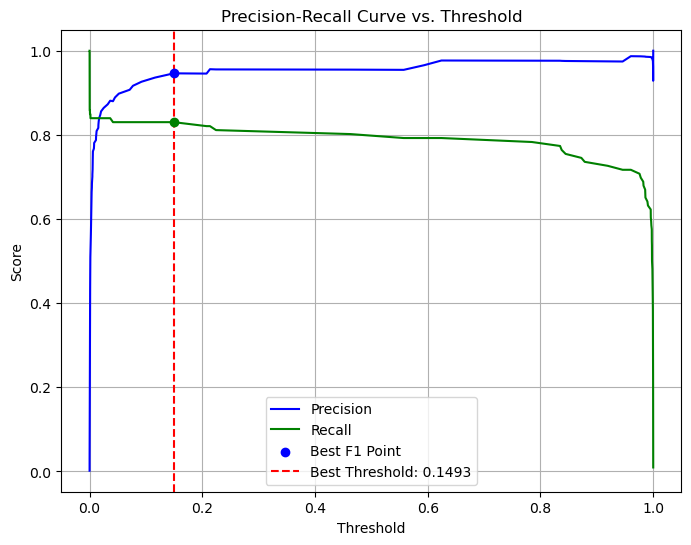

Best Threshold: 0.1493


In [243]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


# F1 score 계산
f1_scores = 2 * precision * recall / (precision + recall + 1e-6)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

# 그래프 시각화 + best F1 point
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color='b')
plt.plot(thresholds, recall[:-1], label="Recall", color='g')
plt.scatter(thresholds[best_idx], precision[best_idx], color='b', label='Best F1 Point', zorder=5)
plt.scatter(thresholds[best_idx], recall[best_idx], color='g', zorder=5)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.4f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Threshold: {best_threshold:.4f}")


In [241]:
probs = xgb_model.predict_proba(test_transformed)[:, 1]
final_preds = (probs >= best_threshold).astype(int)

# 6. classification report 출력
print("\n=== Classification Report with Best Threshold ===")
print(classification_report(test_y, final_preds))


=== Classification Report with Best Threshold ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63976
           1       0.93      0.82      0.87       106

    accuracy                           1.00     64082
   macro avg       0.96      0.91      0.93     64082
weighted avg       1.00      1.00      1.00     64082



## 예측

In [182]:
result_df = pd.read_csv('Result.csv')
result_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,163828,1.803825,-0.515611,-1.849958,0.388327,-0.109106,-0.756433,-0.071282,0.046801,1.226484,...,-0.186078,-0.659247,0.090988,-0.587207,-0.201435,-0.082970,-0.045304,-0.024865,106.16,NaN
1,161280,-0.547158,1.851470,-3.142172,-0.434762,1.905043,-0.955582,0.762074,0.533940,-1.190402,...,0.167646,0.338157,-0.277606,-0.287396,-0.269441,0.529420,-0.267365,-0.025603,0.76,NaN
2,151942,-0.326046,-0.217706,0.529752,-0.210276,0.381230,0.845321,-0.012136,0.122161,-1.551175,...,0.160597,0.627550,0.059524,-0.986212,-0.561194,0.203248,0.084215,0.197627,62.00,NaN
3,78663,-1.192746,0.589859,1.437212,-1.465846,0.904997,0.961699,0.720329,-0.107361,0.201824,...,-0.067400,0.048398,-0.502046,-1.224348,0.502369,1.053619,-0.751317,-0.139799,20.00,NaN
4,116781,1.348242,-1.475166,-1.262404,0.105946,0.281289,1.895419,-0.398966,0.538657,0.897916,...,-0.184420,-0.989198,0.261410,-0.963344,-0.880669,0.197854,-0.058803,-0.019419,288.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71197,66038,-0.882345,1.234006,1.835280,-0.543689,0.421677,-0.947680,1.170509,-0.349857,-0.392525,...,-0.316629,-0.752300,-0.234014,0.290883,0.275506,-0.012386,-0.058481,-0.085526,8.99,NaN
71198,125077,2.048996,-0.366883,-2.543852,-0.728626,2.387568,3.318339,-0.477944,0.791325,0.403268,...,-0.292818,-0.835277,0.380947,0.698226,-0.265129,0.219179,-0.052301,-0.066783,1.79,NaN
71199,154041,2.219642,-0.691482,-1.586185,-0.597533,-0.308073,-0.761185,-0.362941,-0.233413,-0.437414,...,-0.190701,-0.063660,0.139674,0.469916,-0.038320,0.775403,-0.078470,-0.063665,9.00,NaN
71200,40573,1.236821,0.055497,0.617927,0.882157,-0.590356,-0.588493,-0.109363,-0.124856,0.554266,...,-0.087457,0.030614,-0.088960,0.465463,0.603302,0.437325,-0.012067,0.010836,1.00,NaN


In [183]:
result_df['Time_min'] = result_df['Time'] / 60
result_df = apply_fraud_rate_mapping(result_df,bin_edges, fraud_rate_dic)
result_df['Amount'] = np.log1p(result_df['Amount'])

In [184]:
result_df = encoder.transform(result_df)

In [185]:
result_df['Time_min'] = result_df['Time'] // 60

In [186]:
result_df['Time_hour'] = result_df['Time'] // 3600
result_df['Hour_avg_Amount'] =  result_df['Time_hour'].map(hourly_avg).fillna(0)

In [191]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71202 entries, 0 to 71201
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             71202 non-null  int64  
 1   V1               71202 non-null  float64
 2   V2               71202 non-null  float64
 3   V3               71202 non-null  float64
 4   V4               71202 non-null  float64
 5   V5               71202 non-null  float64
 6   V6               71202 non-null  float64
 7   V7               71202 non-null  float64
 8   V8               71202 non-null  float64
 9   V9               71202 non-null  float64
 10  V10              71202 non-null  float64
 11  V11              71202 non-null  float64
 12  V12              71202 non-null  float64
 13  V13              71202 non-null  float64
 14  V14              71202 non-null  float64
 15  V15              71202 non-null  float64
 16  V16              71202 non-null  float64
 17  V17         

In [ ]:
result_df = add_squared_features(result_df)

In [188]:
feature_columns = train_x.columns  # 이전 train_x feature 컬럼 사용
result_df = result_df[feature_columns]
result_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Time_hour,Time_min,Hour_avg_Amount,Time_fraud_rate
0,163828,1.803825,-0.515611,-1.849958,0.388327,-0.109106,-0.756433,-0.071282,0.046801,1.226484,...,-0.587207,-0.201435,-0.082970,-0.045304,-0.024865,4.674323,45,2730,2.857417,0.000491
1,161280,-0.547158,1.851470,-3.142172,-0.434762,1.905043,-0.955582,0.762074,0.533940,-1.190402,...,-0.287396,-0.269441,0.529420,-0.267365,-0.025603,0.565314,44,2688,3.005069,0.001517
2,151942,-0.326046,-0.217706,0.529752,-0.210276,0.381230,0.845321,-0.012136,0.122161,-1.551175,...,-0.986212,-0.561194,0.203248,0.084215,0.197627,4.143135,42,2532,3.017776,0.002001
3,78663,-1.192746,0.589859,1.437212,-1.465846,0.904997,0.961699,0.720329,-0.107361,0.201824,...,-1.224348,0.502369,1.053619,-0.751317,-0.139799,3.044522,21,1311,2.976951,0.000365
4,116781,1.348242,-1.475166,-1.262404,0.105946,0.281289,1.895419,-0.398966,0.538657,0.897916,...,-0.963344,-0.880669,0.197854,-0.058803,-0.019419,5.669640,32,1946,3.203530,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71197,66038,-0.882345,1.234006,1.835280,-0.543689,0.421677,-0.947680,1.170509,-0.349857,-0.392525,...,0.290883,0.275506,-0.012386,-0.058481,-0.085526,2.301585,18,1100,2.981672,0.001513
71198,125077,2.048996,-0.366883,-2.543852,-0.728626,2.387568,3.318339,-0.477944,0.791325,0.403268,...,0.698226,-0.265129,0.219179,-0.052301,-0.066783,1.026042,34,2084,3.382447,0.001403
71199,154041,2.219642,-0.691482,-1.586185,-0.597533,-0.308073,-0.761185,-0.362941,-0.233413,-0.437414,...,0.469916,-0.038320,0.775403,-0.078470,-0.063665,2.302585,42,2567,3.017776,0.002024
71200,40573,1.236821,0.055497,0.617927,0.882157,-0.590356,-0.588493,-0.109363,-0.124856,0.554266,...,0.465463,0.603302,0.437325,-0.012067,0.010836,0.693147,11,676,3.442652,0.004219


In [195]:
weights = {
    'rf': 0.5,
    'xgb': 0.3,
    'logi' : 0.2
}
threshold=0.5

In [201]:
result_df = result_df.drop(columns=['Class'], errors='ignore')

In [202]:
# 2. base model predict_proba

xgb_probs_result = xgb_model.predict_proba(result_df)[:, 1]

logi_pr = Logi_model.predict_proba(result_df)[:, 1]
optimal_threshold = 0.949  # 선택한 threshold 값
logi_probs_result = (logi_pr >= optimal_threshold).astype(int)


# 3. ensemble weighted voting
ensemble_probs_result = (
    rf_probs_result * weights['rf'] +
    xgb_probs_result * weights['xgb'] +
    logi_probs_result * weights['logi']
)

# 4. threshold 적용 (최적 threshold: 0.28)
final_preds_result = (ensemble_probs_result >= best_threshold).astype(int)

result = pd.read_csv('Result.csv')
# 5. 결과 저장
result['Class'] = final_preds_result

In [203]:
result

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,163828,1.803825,-0.515611,-1.849958,0.388327,-0.109106,-0.756433,-0.071282,0.046801,1.226484,...,-0.186078,-0.659247,0.090988,-0.587207,-0.201435,-0.082970,-0.045304,-0.024865,106.16,0
1,161280,-0.547158,1.851470,-3.142172,-0.434762,1.905043,-0.955582,0.762074,0.533940,-1.190402,...,0.167646,0.338157,-0.277606,-0.287396,-0.269441,0.529420,-0.267365,-0.025603,0.76,0
2,151942,-0.326046,-0.217706,0.529752,-0.210276,0.381230,0.845321,-0.012136,0.122161,-1.551175,...,0.160597,0.627550,0.059524,-0.986212,-0.561194,0.203248,0.084215,0.197627,62.00,0
3,78663,-1.192746,0.589859,1.437212,-1.465846,0.904997,0.961699,0.720329,-0.107361,0.201824,...,-0.067400,0.048398,-0.502046,-1.224348,0.502369,1.053619,-0.751317,-0.139799,20.00,0
4,116781,1.348242,-1.475166,-1.262404,0.105946,0.281289,1.895419,-0.398966,0.538657,0.897916,...,-0.184420,-0.989198,0.261410,-0.963344,-0.880669,0.197854,-0.058803,-0.019419,288.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71197,66038,-0.882345,1.234006,1.835280,-0.543689,0.421677,-0.947680,1.170509,-0.349857,-0.392525,...,-0.316629,-0.752300,-0.234014,0.290883,0.275506,-0.012386,-0.058481,-0.085526,8.99,0
71198,125077,2.048996,-0.366883,-2.543852,-0.728626,2.387568,3.318339,-0.477944,0.791325,0.403268,...,-0.292818,-0.835277,0.380947,0.698226,-0.265129,0.219179,-0.052301,-0.066783,1.79,0
71199,154041,2.219642,-0.691482,-1.586185,-0.597533,-0.308073,-0.761185,-0.362941,-0.233413,-0.437414,...,-0.190701,-0.063660,0.139674,0.469916,-0.038320,0.775403,-0.078470,-0.063665,9.00,0
71200,40573,1.236821,0.055497,0.617927,0.882157,-0.590356,-0.588493,-0.109363,-0.124856,0.554266,...,-0.087457,0.030614,-0.088960,0.465463,0.603302,0.437325,-0.012067,0.010836,1.00,0


In [204]:
# 파일 저장
result.to_csv('classifier_prediction_0414_87.csv', index=False)